# Определение перспективного тарифа для телеком компании

## Оглавление

1. [Задание](#step0)  
2. [Шаг 1. Откройте файл с данными и изучите общую информацию](#step1)  
3. [Шаг 2. Подготовка данных](#step2)
4. [Шаг 3. Проанализируйте данные](#step3)
5. [Шаг 4. Проверка гипотез](#step4)  
6. [Шаг 5. Общий вывод](#step5)  

### Задание <a id="step0"></a>   
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
Описание тарифов
Тариф «Смарт»

    Ежемесячная плата: 550 рублей
    Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета:
        минута разговора: 3 рубля
        сообщение: 3 рубля
        1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»

    Ежемесячная плата: 1950 рублей
    Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета:
        минута разговора: 1 рубль
        сообщение: 1 рубль
        1 Гб интернет-трафика: 150 рублей

Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

### Шаг 1. Откройте файлы с данными и изучите общую информацию <a id="step1"></a>  

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# Откроем файлы с данными. Данные представлены в 5 таблицах с именами 'calls.csv', 'internet.csv', 'messages.csv', 'tariffs.csv', 'users.csv'
calls_data = pd.read_csv('3_project_data\\calls.csv')
internet_data = pd.read_csv('3_project_data\\internet.csv')
messages_data = pd.read_csv('3_project_data\\messages.csv')
tariffs_data = pd.read_csv('3_project_data\\tariffs.csv')
users_data = pd.read_csv(r'3_project_data\\users.csv')

In [3]:
# Добавляем новую библиотеку и метод
from IPython.display import display
# Просмотрел вид и формат массивов данных
for name in [calls_data, internet_data, messages_data, tariffs_data, users_data]:
    print(name.info())
    print(name.describe(include='all'))
    display(name)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None
            id   call_date       duration        user_id
count   202607      202607  202607.000000  202607.000000
unique  202607         365            NaN            NaN
top     1000_0  2018-12-31            NaN            NaN
freq         1        1435            NaN            NaN
mean       NaN         NaN       6.755887    1253.940619
std        NaN         NaN       5.843365     144.722751
min        NaN         NaN       0.000000    1000.000000
25%        NaN         NaN       1.300000    1126.000000
50%        NaN         NaN       6.000000    1260.000000
75%    

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None
           Unnamed: 0      id        mb_used session_date        user_id
count   149396.000000  149396  149396.000000       149396  149396.000000
unique            NaN  149396            NaN          365            NaN
top               NaN  1000_0            NaN   2018-12-31            NaN
freq              NaN       1            NaN         1057            NaN
mean     74697.500000     NaN     370.192426          NaN    1252.099842
std      43127.054745     NaN     278.300951          NaN     144.050823
min 

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None
            id message_date        user_id
count   123036       123036  123036.000000
unique  123036          364            NaN
top     1000_0   2018-12-31            NaN
freq         1          859            NaN
mean       NaN          NaN    1256.989410
std        NaN          NaN     143.523967
min        NaN          NaN    1000.000000
25%        NaN          NaN    1134.000000
50%        NaN          NaN    1271.000000
75%        NaN          NaN    1381.000000
max        NaN          NaN    1499.000000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None
        messages_included  mb_per_month_included  minutes_included  \
count            2.000000               2.000000          2.000000   
unique                NaN                    NaN               NaN   
top                   NaN                    NaN               NaN   
freq                  NaN                    NaN  

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
            user_id        age  churn_date    city first_name  last_name  \
count    500.000000  500.00000          38     500        500        500   
unique          NaN        NaN          33      76        246        419   
top             NaN        NaN  2018-12-03  Москва      Радим  Андреенко   
freq            NaN        NaN           2      99          6          5   
mean    1249.500000   46.58800         NaN     NaN        Na

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


### Описание данных:

In [4]:
# Проверка количества клиентов массивах данных
for column in [calls_data, internet_data, messages_data, users_data]:
    print(column.user_id.unique().shape[0])

492
497
426
500


Размер массивов различается. В calls_data, internet_data, messages_dat есть пропущенные клиенты по причине того, что клиенты в определенные месяцы могли не пользоваться услугами. Это значит что при склейке данных могут появится пустые значения.

### Вывод

Базы данных не полностью готовы для полноценной работы с ними. Формат данных отдельных значений следует изменить с float на int для более удобного анализа, также данные связанные с датами следует привести в удобный для анализа формат, а это значит что необходимо провести предобработку данных для дальнейшего анализа.

### Шаг 2. Подготовка данных <a id="step2"></a>  
*    Приведите данные к нужным типам;
*    Найдите и исправьте ошибки в данных, если они есть.
*    Поясните, какие ошибки вы нашли и как их исправили. 

В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.

Посчитайте для каждого пользователя:

    количество сделанных звонков и израсходованных минут разговора по месяцам;
    количество отправленных сообщений по месяцам;
    объем израсходованного интернет-трафика по месяцам;
    помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [5]:
# Приводим в удобный формат дату
internet_data['session_date']=pd.to_datetime(internet_data['session_date'], format='%Y-%m-%d')

# Добавляем колонку с месяцем
internet_data['month'] = internet_data['session_date'].dt.month

# Создадим сводную таблицу для определения объема израсходованного интернет-трафика по месяцам
internet_pivot_data = internet_data.groupby(['user_id','month']).agg({'mb_used' : 'sum'}).reset_index()

# Создадим колонку gb_used с данными из mb_used округленнубю по правилам компании "Мегалайн"
internet_pivot_data['gb_used'] = np.ceil(internet_pivot_data.mb_used/1024)

In [6]:
# Приведем в удобный формат дату
calls_data['call_date']=pd.to_datetime(calls_data['call_date'], format='%Y-%m-%d')

# Добавим колонку с месяцем
calls_data['month'] = calls_data['call_date'].dt.month

# Окргулим в большую сторону продолжительность звонков
calls_data.duration=np.ceil(calls_data.duration)

# Построим сводную таблицу для определения количества сделанных звонков и израсходованных минут разговора по месяцам
calls_pivot_data=calls_data.pivot_table(index = ['user_id','month'], values = 'duration', aggfunc=['count', 'sum'] ).reset_index()

# Переименуем названия колонок в таблице
calls_pivot_data.columns = ['user_id', 'month', 'count_calls', 'sum_calls']

In [7]:
# Приведем в удобный формат дату
messages_data['message_date']=pd.to_datetime(messages_data['message_date'], format='%Y-%m-%d')

# Добавляем колонку с месяцем
messages_data['month'] = messages_data['message_date'].dt.month

# Построим сводную таблицу для определения количества отправленных сообщений по месяцам
messages_pivot_data = messages_data.groupby(['user_id','month']).agg({'message_date' : 'count'}).reset_index()

# Переименновываем названия колонок в таблице
messages_pivot_data.columns = ['user_id', 'month', 'messages_in_month']

Изменили формат даты звонков, смс и использования интренета, создали колонки 'month' для дальнейшей группировки данных по месяцам. Создали сводные таблицы, сгруппированые по клиентам и месяцам для дальнейшего анализа. 
Продолжительность звонка и использованных мегабайтах округлил в зависимости правил компании "Мегалайн".

In [8]:
# Объединим по user_id ранее созданные сводные таблицы в общий массив данных.
data_users_pivot=(users_data[['user_id']]
               .merge(calls_pivot_data, how = 'outer')
               .merge(internet_pivot_data, how = 'outer')
               .merge(messages_pivot_data, how = 'outer'))

In [9]:
# Добавим информацию по тарифам и городам
data_users_pivot=data_users_pivot.merge(users_data[['tariff', 'city', 'user_id']], how = 'left', on='user_id')

Создали новую таблицу 'data_users_pivot' путем объединения инфомации из сводных таблиц нескольких массивов данных с помощью метода merge, объединением - 'outer', чтобы не потерять данные из всех таблиц, а также из "users_data" добавили информацию про тарифы и города клиентов с помощью метода merge, объединением - 'left'.

In [10]:
# Проверим таблицу data_users_pivot
data_users_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3222 entries, 0 to 3221
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            3222 non-null   int64  
 1   month              3214 non-null   float64
 2   count_calls        3174 non-null   float64
 3   sum_calls          3174 non-null   float64
 4   mb_used            3203 non-null   float64
 5   gb_used            3203 non-null   float64
 6   messages_in_month  2717 non-null   float64
 7   tariff             3222 non-null   object 
 8   city               3222 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 251.7+ KB


Т.к количество значений по колонкам в таблице 'data_users_pivot' разнятся, можно сделать вывод что в таблице пристутвтуют пропуски данных

In [11]:
# Проверим нулевые значения
data_users_pivot[data_users_pivot.month.isna()]

,user_id,month,count_calls,sum_calls,mb_used,gb_used,messages_in_month,tariff,city
570,1091,NaN,NaN,NaN,NaN,NaN,NaN,ultra,Набережные Челны
664,1106,NaN,NaN,NaN,NaN,NaN,NaN,ultra,Калуга
812,1128,NaN,NaN,NaN,NaN,NaN,NaN,ultra,Волжский
1460,1231,NaN,NaN,NaN,NaN,NaN,NaN,ultra,Чебоксары
2061,1328,NaN,NaN,NaN,NaN,NaN,NaN,ultra,Мурманск
2311,1371,NaN,NaN,NaN,NaN,NaN,NaN,smart,Омск
3022,1473,NaN,NaN,NaN,NaN,NaN,NaN,ultra,Красноярск
3121,1489,NaN,NaN,NaN,NaN,NaN,NaN,smart,Санкт-Петербург


Строки с пустыми значениями месяца обусловлены тем что по иформации о данных пользователях нет ни в одной из таблице активностей 'calls_data', 'internet_data', 'messages_data'. Иформация о данных пользователях была только в таблице информации пользователей 'users_data'.

Данные строки можно удалить.

In [12]:
# Удаляем строки с пустыми значениями в месяцах
data_users_pivot = data_users_pivot[data_users_pivot.month.isna() == False]

In [13]:
# Заполняем нулями пустые значения
data_users_pivot=data_users_pivot.fillna(0)

In [14]:
# Переводим данные из float в int
for column in ['month','count_calls', 'sum_calls', 'mb_used', 'gb_used','messages_in_month']:
    data_users_pivot[column]=data_users_pivot[column].astype('int')

In [15]:
# Проверим обработанную таблицу
data_users_pivot.describe(include='all')
data_users_pivot.tariff.unique()

array(['ultra', 'smart'], dtype=object)

Теперь в таблице нет пустых значений и у всех данных нужный формат.

In [16]:
# Переименуем столбец по тарифам в таблице tariffs_data
tariffs_data=tariffs_data.rename(columns={'tariff_name': 'tariff'})

# Сгруппируем массивы данных
data_users_pivot=(data_users_pivot.merge(tariffs_data, how = 'left', on = ['tariff']))

In [17]:
data_users_pivot.head(10)

,user_id,month,count_calls,sum_calls,mb_used,gb_used,messages_in_month,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22,159,2253,3,22,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,6,43,172,23233,23,60,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,7,47,340,14003,14,75,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,8,52,408,14055,14,81,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,9,58,466,14568,15,57,ultra,Краснодар,1000,30720,3000,1950,150,1,1
5,1000,10,57,350,14702,15,73,ultra,Краснодар,1000,30720,3000,1950,150,1,1
6,1000,11,43,338,14756,15,58,ultra,Краснодар,1000,30720,3000,1950,150,1,1
7,1000,12,46,333,9817,10,70,ultra,Краснодар,1000,30720,3000,1950,150,1,1
8,1001,11,59,430,18429,18,0,smart,Москва,50,15360,500,550,200,3,3
9,1001,12,63,414,14036,14,0,smart,Москва,50,15360,500,550,200,3,3


In [18]:
tariffs_data

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [19]:
# Добавим функцию, для расчета выручки
def income(row):
    income = row['rub_monthly_fee']
    if row['sum_calls'] > row['minutes_included']:   # условие для расчета выплаты за превышение лимита звонков     
        extra_calls = row['sum_calls'] - row['minutes_included']
        income += extra_calls * row['rub_per_minute']
    if row['messages_in_month'] > row['messages_included']: # условие для расчета выплаты за превышение лимита сообщений 
        extra_messages = row['messages_in_month'] - row['messages_included']
        income += extra_messages * row['rub_per_message']
    tariffs_gb_used = row['mb_per_month_included'] / 1024 # расчет лимита трафика в гигабайтах
    if row['gb_used'] > tariffs_gb_used : # условие для расчета выплаты за превышение лимита трафика в гигабайтах
        extra_gb = row['gb_used'] - tariffs_gb_used
        income += extra_gb * row['rub_per_gb']
    return income

In [20]:
# Применим функцию
data_users_pivot['income']=data_users_pivot.apply(income, axis =1)  

In [22]:
# Проверим везде ли отработала функция income
print(data_users_pivot.info())
display(data_users_pivot)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   int32  
 2   count_calls            3214 non-null   int32  
 3   sum_calls              3214 non-null   int32  
 4   mb_used                3214 non-null   int32  
 5   gb_used                3214 non-null   int32  
 6   messages_in_month      3214 non-null   int32  
 7   tariff                 3214 non-null   object 
 8   city                   3214 non-null   object 
 9   messages_included      3214 non-null   int64  
 10  mb_per_month_included  3214 non-null   int64  
 11  minutes_included       3214 non-null   int64  
 12  rub_monthly_fee        3214 non-null   int64  
 13  rub_per_gb             3214 non-null   int64  
 14  rub_per_message        3214 non-null   int64  
 15  rub_

,user_id,month,count_calls,sum_calls,mb_used,gb_used,messages_in_month,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,income
0,1000,5,22,159,2253,3,22,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6,43,172,23233,23,60,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7,47,340,14003,14,75,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8,52,408,14055,14,81,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9,58,466,14568,15,57,ultra,Краснодар,1000,30720,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0,0,11050,11,17,smart,Санкт-Петербург,50,15360,500,550,200,3,3,550.0
3210,1489,9,0,0,17206,17,32,smart,Санкт-Петербург,50,15360,500,550,200,3,3,950.0
3211,1489,10,0,0,19559,20,21,smart,Санкт-Петербург,50,15360,500,550,200,3,3,1550.0
3212,1489,11,0,0,17491,18,20,smart,Санкт-Петербург,50,15360,500,550,200,3,3,1150.0


Объединили "data" и "tariffs_data" в общую таблицу "data_users_pivot". В "data_users_pivot" есть информация по клиентам, каким тарифом он пользуется и какие у тарифа расценки для подсчета выручки. С помощью функции "income(row)" была добавлена информация о рыручке в столбец "income" соотвественно. Таблица по итогу имеет правильный вид и вся информация хранится в нужном формате.

### Вывод

### Шаг 3. Проанализируйте данные<a id="step3"></a>  
Проанализируйте данные

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [23]:
# Создадим отдельные таблицы для каждого тарифа
smart_data = data_users_pivot.query('tariff == "smart"').copy()
ultra_data = data_users_pivot.query('tariff == "ultra"').copy()

# Оставим в таблицах необходимую информацию для дальнейших расчетов 
smart_data=smart_data[['user_id', 'month', 'sum_calls', 'messages_in_month', 'mb_used', 'income']]
ultra_data=ultra_data[['user_id', 'month', 'sum_calls', 'messages_in_month', 'mb_used', 'income']]

In [24]:
import numpy as np
for column in ['sum_calls', 'messages_in_month', 'mb_used', 'income']:
    print (np.var(smart_data[column], ddof=1))
smart_data.describe()

36219.31578434424
796.8129584480083
34462539.42796006
669785.7080064153


,user_id,month,sum_calls,messages_in_month,mb_used,income
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,1246.506505,8.346792,417.934948,33.384029,16207.881113,1289.973531
std,146.119496,2.920316,190.313730,28.227876,5870.480340,818.404367
min,1001.000000,1.000000,0.000000,0.000000,0.000000,550.000000
25%,1121.000000,6.000000,282.000000,10.000000,12643.000000,550.000000
50%,1239.000000,9.000000,422.000000,28.000000,16506.000000,1023.000000
75%,1376.000000,11.000000,545.000000,51.000000,20042.000000,1750.000000
max,1499.000000,12.000000,1435.000000,143.000000,38552.000000,6770.000000


In [25]:
for column in ['sum_calls', 'messages_in_month', 'mb_used', 'income']:
    print (np.var(ultra_data[column], ddof=1))
ultra_data.describe()

100873.63339730089
2285.2661425446818
101751093.9661961
141516.74507861698


,user_id,month,sum_calls,messages_in_month,mb_used,income
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,1263.094416,8.250761,526.623350,49.363452,19468.326904,2070.152284
std,140.694908,2.871762,317.606098,47.804457,10087.174727,376.187114
min,1000.000000,1.000000,0.000000,0.000000,0.000000,1950.000000
25%,1143.000000,6.000000,284.000000,6.000000,11770.000000,1950.000000
50%,1277.000000,9.000000,518.000000,38.000000,19308.000000,1950.000000
75%,1381.000000,11.000000,752.000000,79.000000,26837.000000,1950.000000
max,1495.000000,12.000000,1673.000000,224.000000,49745.000000,4800.000000


Тариф smart: 
Для звонков среднее количество 417.93, дисперсия 36219.32 и стандартное отклонение 190.31; 
для СМС среднее количество 33.38, дисперсия 796.81 и стандартное отклонение 28.22; 
для интернета среднее количество 16207.88, дисперсия 34462539.43 и стандартное отклонение 5870.48.

Тариф ultra: 
Для звонков среднее количество 526.62, дисперсия 100873.63 и стандартное отклонение 317.60; 
для СМС среднее количество 49.36, дисперсия 2285.26 и стандартное отклонение 47.80; 
для интернета среднее количество 19468.33, дисперсия 101751093.97 и стандартное отклонение 10087.17.

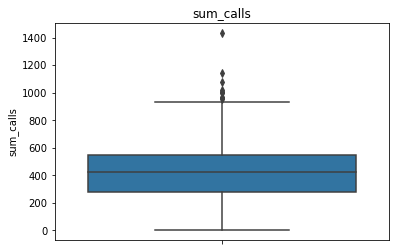

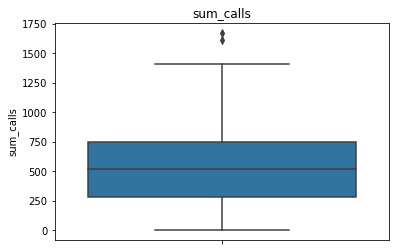

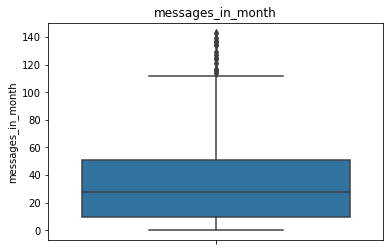

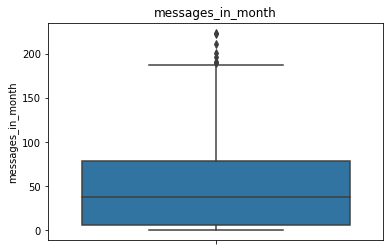

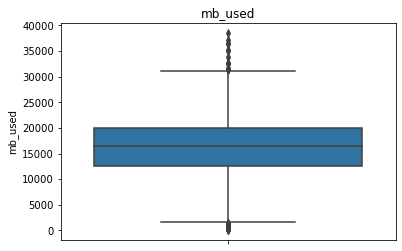

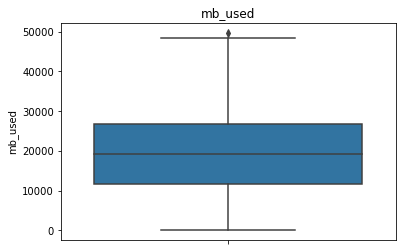

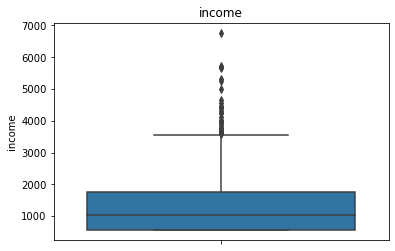

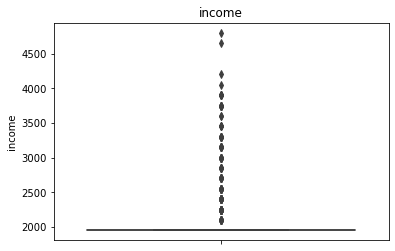

In [26]:
# Построим диаграммы размаха для нескольких данных с помощью цикла
for name in ['sum_calls', 'messages_in_month', 'mb_used', 'income']:
    for data in [smart_data, ultra_data]:
        sns.boxplot(y=name, data=data)
        plt.title(name)
        plt.show()

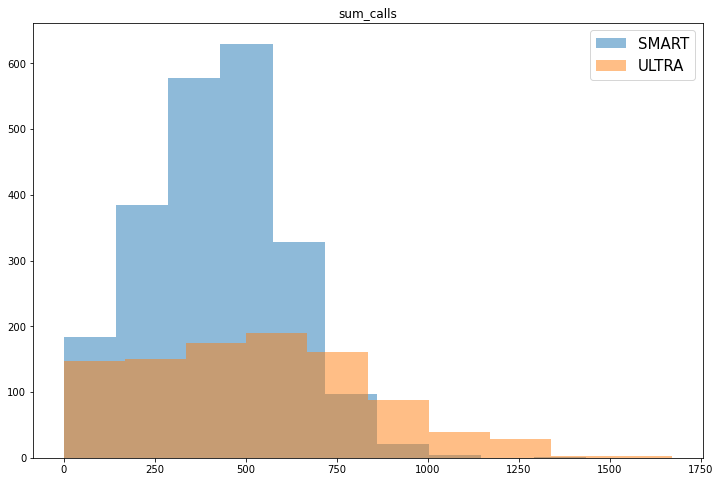

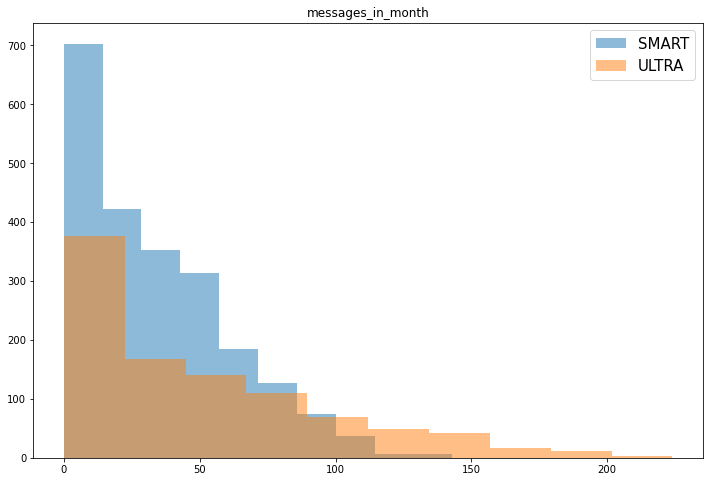

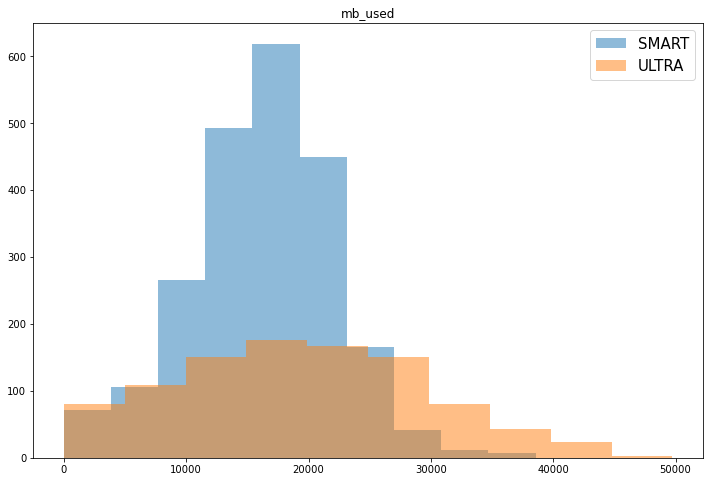

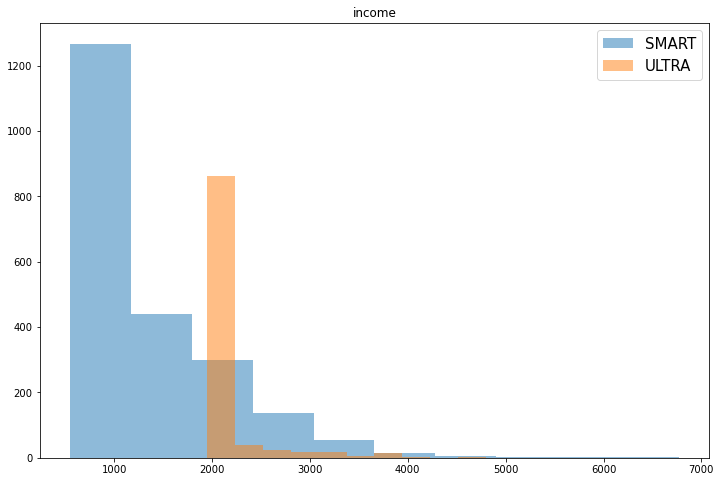

In [27]:
# Построим гистрограммы для нескольких данных с помощью цикла
for column in ['sum_calls', 'messages_in_month', 'mb_used', 'income']: 
    plt.figure(figsize = (12,8))
    plt.title(column)
    plt.hist(smart_data[column], bins = 10, alpha = 0.5, label ='SMART')
    plt.hist(ultra_data[column], bins = 10, alpha = 0.5, label = 'ULTRA')
    plt.legend(prop={'size': 15})

### Вывод

Изучив данные гистограммы можно прийти к выводу: количество звонков нормально рапределены у обоих тарифов. Распределение тарифа smart немного скошено влево, а у тарифа ultra скошено вправо. Центр гистограммы таррифа ultra более пологий чем у smart. Это значит что продолжительность звонков клиентов тарифа ultra распределен более равномерно и нет сильно выделяющегося значения.
Количество СМС имеют экспоненциальное распределение у обоих тарифов. Количество используемого интернет трафика у обоих тарифов имеет нормальное распределение. smart немного скошено влево ultra немного скошено вправо. Важно отметить что средние значения всех показателей примерно равны.

### Шаг 4. Проверка гипотез<a id="step4"></a>  
    средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
    средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Пороговое значение alpha задайте самостоятельно.
Поясните:

    как вы формулировали нулевую и альтернативную гипотезы;
    какой критерий использовали для проверки гипотез и почему.

№1 Нулевая гипотеза "средняя выручка пользователей тарифов «Ультра» и «Смарт» равны". Альтернативная гипотеза "средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны". Пороговое значение alpha равно 5%. 

In [28]:
# Проверка что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
from scipy import stats as st

alpha = 0.05

results = st.ttest_ind(smart_data['income'], ultra_data['income']) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


После проверки отвергаем нулевую гипотезу. Получается что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

№2 Нулевая гипотеза "средняя выручка пользователей из Москвы и других регионов равны". Альтернативная гипотеза "средняя выручка пользователей пользователей из Москвы и других регионов не равны". Пороговое значение alpha равно 5%. 

In [30]:
# Проверка что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

alpha = 0.05

results = st.ttest_ind(data_users_pivot.query('city == "Москва"')['income'], data_users_pivot.query('city != "Москва"')['income'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


После проверки не получилось отвергнуть нулевую гипотезу. Получается что средняя выручка пользователей из Москвы и других регионов могут быть равны.

H₀ сформулированы так, чтобы использовать знак равенства при сравнении показателей. 
Использован t-критерий так как его лучше использовать для проверки равенства средних значений в двух выборках.

### Шаг 5. Общий вывод<a id="step5"></a>  

Изначально были обработаны исходные датасеты и обеъдинены в общие массивы данных для более удобной и наглядной обработки. Изменен формат записи числовых и календарных данных, удалены пустые строки, которые не повлияли на дальнейшие подсчеты. 

Посчитана выручка по каждому клиенту в месяц, основные метрики типа кол-ва смс, звонков и используемого интернета для каждого тарифа. 
Визулизированы данные с помощью диаграмм размаха и гистограм.

Средние показатели по использованию интернета, смс и звонков сильно не различаются. Это видно из проверки основных метрик тарифов. После проверки гипотез можно сделать выводы, что выручка по данным тарифам по клиентам в месяц различаются, а также нельзя утверждать, что выручка от московских клиентов выше, чем от клиентов из других регионов. 

Выручка по клиенту от тарифа ultra выше чем от тарифа smart. Это значит, что выгоднее развивать продукт ultra и привлекать больше людей его использовать. 